In [1]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df = pd.get_dummies(df)

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 8))
sns.histplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


Accuracy: 0.9665955934612651
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1033
        True       1.00      0.87      0.93       374

    accuracy                           0.97      1407
   macro avg       0.98      0.94      0.96      1407
weighted avg       0.97      0.97      0.97      1407



MemoryError: Unable to allocate 17.9 GiB for an array with shape (599733096, 4) and data type float64

<Figure size 1000x800 with 1 Axes>

Accuracy: 0.9665955934612651
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1033
        True       1.00      0.87      0.93       374

    accuracy                           0.97      1407
   macro avg       0.98      0.94      0.96      1407
weighted avg       0.97      0.97      0.97      1407



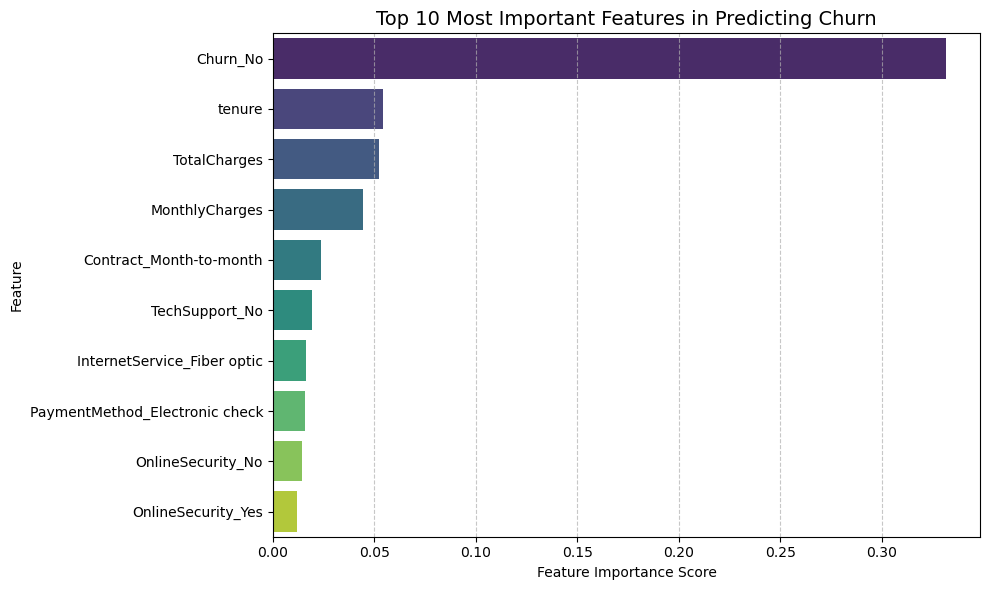

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df = pd.get_dummies(df)

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
features = X.columns

feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort and get top 10
top_features = feat_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Most Important Features in Predicting Churn", fontsize=14)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Accuracy: 0.9665955934612651
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1033
        True       1.00      0.87      0.93       374

    accuracy                           0.97      1407
   macro avg       0.98      0.94      0.96      1407
weighted avg       0.97      0.97      0.97      1407



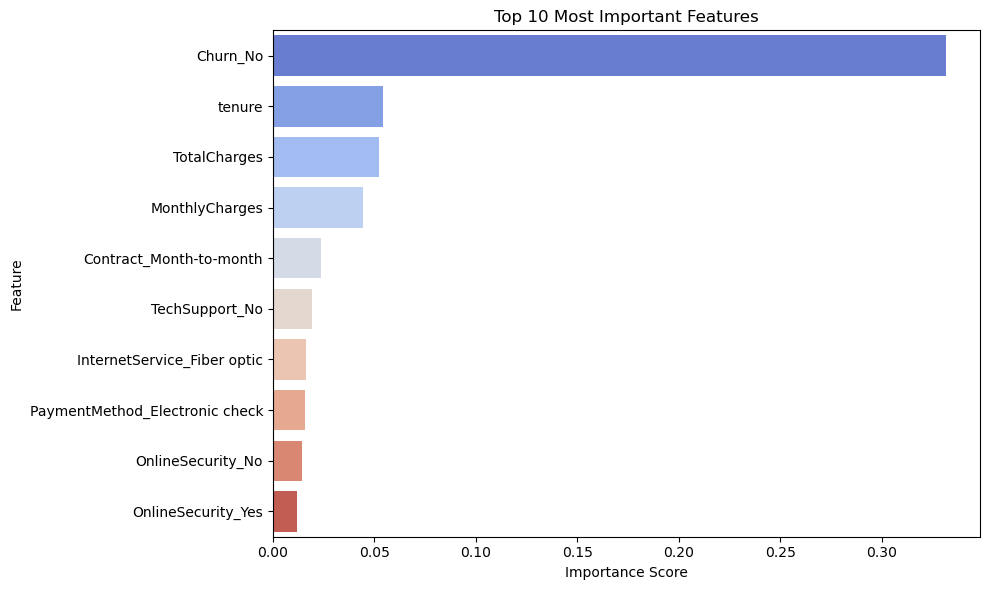

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df = pd.get_dummies(df)

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
features = X.columns

feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feat_importances.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



Accuracy: 0.7526652452025586

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



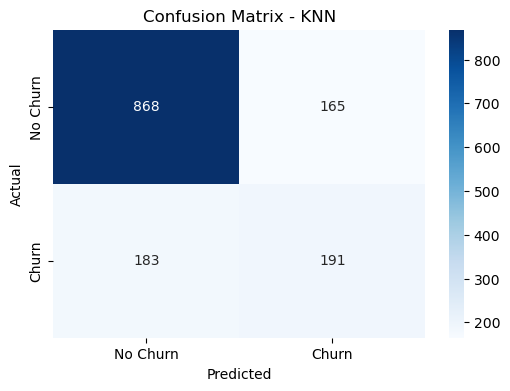

In [7]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 3. Drop unnecessary column
df.drop('customerID', axis=1, inplace=True)

# 4. Convert TotalCharges to numbers and drop missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 5. Convert 'Churn' to 0/1 manually
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 6. Convert other categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

# 7. Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 8. Scale the features for KNN (very important!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10. Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 11. Predict
y_pred = knn.predict(X_test)

# 12. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 13. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


Accuracy: 0.7526652452025586

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



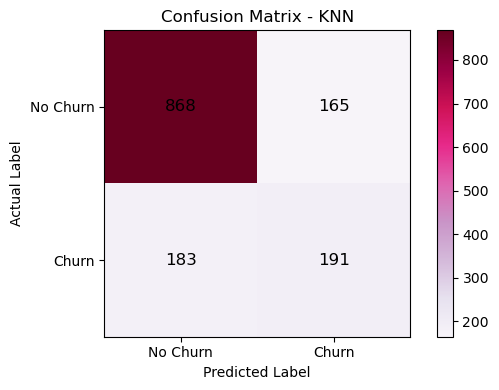

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)


X = df.drop('Churn', axis=1)
y = df['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
classes = ['No Churn', 'Churn']

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)
plt.title("Confusion Matrix - KNN")
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black', fontsize=12)

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")1
plt.tight_layout()
plt.show()


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

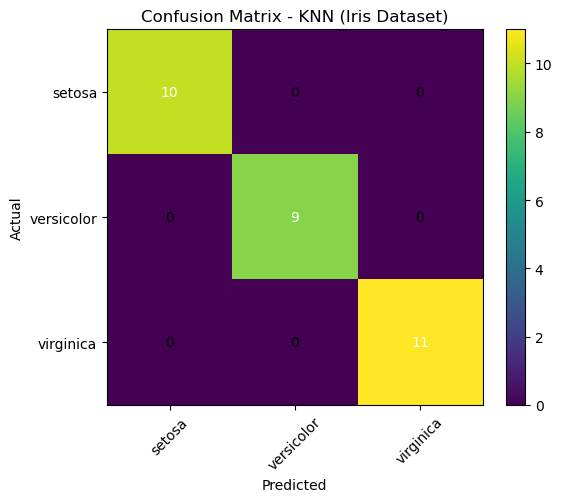

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict
y_pred = knn.predict(X_test_scaled)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 7. Confusion Matrix (Matplotlib only)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title("Confusion Matrix - KNN (Iris Dataset)")
plt.colorbar()

tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Annotate each cell
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i][j] > 1 else 'black')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


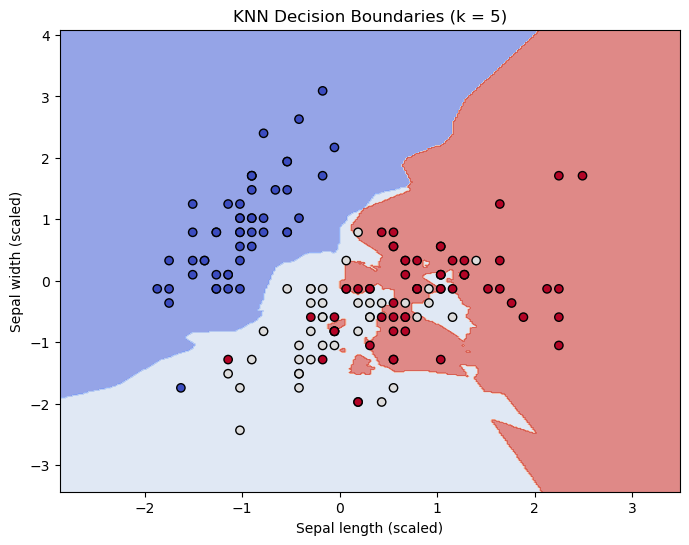

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only 2 features: sepal length and sepal width
y = iris.target
class_names = iris.target_names

# 2. Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Fit the KNN model
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# 4. Create meshgrid
h = .02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 5. Predict over the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('length (scaled)')
plt.ylabel(' width (scaled)')
plt.title("KNN Decision Boundaries (k = 5)")
plt.show()


2025-05-29 16:47:39.864 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 16:47:39.864 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 16:47:40.352 
  command:

    streamlit run C:\Users\bhara\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-29 16:47:40.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 16:47:40.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 16:47:40.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-29 16:47:40.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

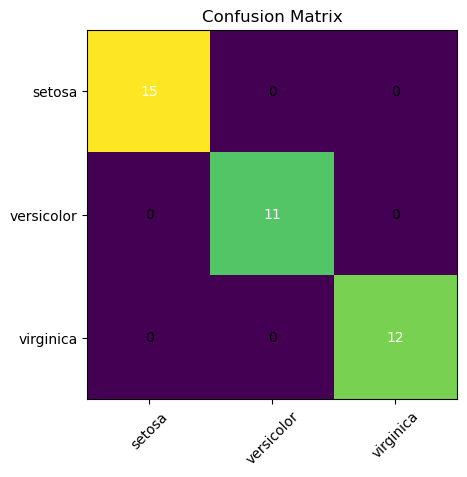

In [20]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

st.set_page_config(page_title="KNN Iris App", layout="centered")

st.title("🌸 Iris Classification using KNN")

# Sidebar: Set K
k = st.sidebar.slider("Choose K (number of neighbors)", 1, 15, 5)

# Load data
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = knn.score(X_test, y_test)
st.write(f"✅ **Accuracy**: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ax.imshow(cm, cmap='viridis')
ax.set_title("Confusion Matrix")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(class_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > 1 else "black")
st.pyplot(fig)

# Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
st.dataframe(report_df.style.background_gradient(cmap='BuGn'))
